degrees: (5958, 5554, 5310, 4977, 4755, 4716, 4659, 4565, 4217, 4206, 4110, 4043, 3961, 3861, 3841, 3780, 3771, 3739, 3733, 3704, 3636, 3606, 3593, 3574, 3550, 3431, 3422, 3410, 3404, 3294, 3279, 3244, 3208, 3206, 3190, 3182, 3163, 3152, 3145, 3144, 3142, 3120, 3088, 3081, 3057, 3053, 3042, 2983, 2914, 2896, 2887, 2870, 2865, 2818, 2813, 2800, 2795, 2791, 2789, 2780, 2777, 2773, 2766, 2754, 2735, 2734, 2733, 2713, 2712, 2706, 2698, 2696, 2683, 2676, 2639, 2626, 2609, 2608, 2595, 2590, 2580, 2573, 2567, 2558, 2553, 2546, 2538, 2519, 2499, 2496, 2488, 2486, 2474, 2473, 2468, 2467, 2466, 2463, 2462, 2457, 2451, 2449, 2445, 2443, 2442, 2439, 2438, 2436, 2429, 2427, 2420, 2417, 2416, 2404, 2403, 2383, 2380, 2377, 2372, 2371, 2369, 2359, 2357, 2352, 2348, 2341, 2335, 2318, 2313, 2310, 2307, 2304, 2302, 2298, 2297, 2279, 2267, 2266, 2260, 2258, 2257, 2256, 2254, 2248, 2246, 2242, 2228, 2223, 2218, 2213, 2203, 2197, 2184, 2182, 2180, 2177, 2175, 2174, 2173, 2167, 2163, 2162, 2144, 2141, 2138, 

Calculating best minimal value for power law fit
/home/francisca/anaconda3/lib/python3.6/site-packages/powerlaw.py:700: RuntimeWarning: invalid value encountered in true_divide
  (Theoretical_CDF * (1 - Theoretical_CDF))


Gamma: 4.769445435980543
kmin: 0.5273075083692019
kmax: None


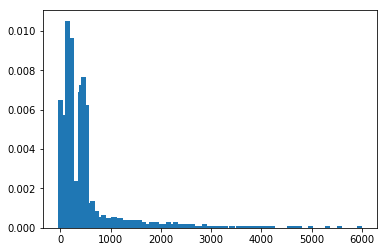

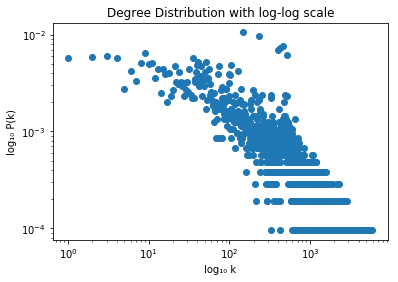

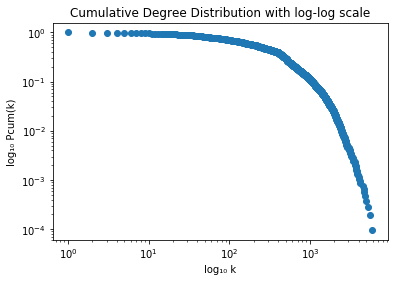

In [80]:
import networkx as nx
#import numpy as np
import matplotlib.pyplot as plt
import collections
import powerlaw as pl

#1.Creation of Graph
def createGraph():
    G=nx.Graph()

    #read edges from csv file
    file_edges=open("4-edges.csv", "r")
    #for n in range(200):
    while(1):
        content = file_edges.readline()
        if content == "":
            break
        line = content.split(",")
        #print(line[0], line[1], line[2])
        G.add_edge(line[0], line[1]) #ignore weight of edges
    
    return G
    #number_of_nodes = G.number_of_nodes()

#2.Degree analysis

#Average Degree
def averageDegree(G):
    E = G.number_of_edges()
    N = G.number_of_nodes()
    av_degree = (2*E)/N
    return av_degree

#Degree Distribution

#obtain degree histogram
#def histogram(G):
 #   degrees = G.degree #get list with pairs (node, degree)
    #print("Degrees:", degrees)
  #  valuesDeg = [d for n, d in degrees] #get list of degrees of each node
  #  plt.hist(valuesDeg, 100, range=[0, 3500], normed=1) #plot histogram (normalized count)
  #  plt.title("Degree Histogram")
  #  plt.ylabel("P(k)")
  #  plt.xlabel("k")
  #  plt.show()
    
#obtain plot of histogram, degree distribution and cumulative degree distribution
def distribution(G):
    #get sequence of the degrees of each node ordered 
    degree_sequence = sorted([d for n, d in G.degree()], reverse=True)
    #print("Degree sequence", degree_sequence)
    degreeCount = collections.Counter(degree_sequence) #gives a list that as the degree and number of times it repeats
    #print("Degree count", degreeCount)
    degree, count = zip(*degreeCount.items()) #to obtain arguments separated 
    N = G.number_of_nodes()
    count = list(count) #convert to list
    # normalize count to obtain P(k)
    for i in range(len(count)):
        count[i] = count[i]/N
    
    plt.figure() 
    plt.bar(degree, count, width=100) #plot histogram
    
    plt.figure()
    plt.loglog(degree, count, 'o') #plot with log scaling on both axis
    plt.title("Degree Distribution with log-log scale")
    plt.ylabel("log₁₀ P(k)")
    plt.xlabel("log₁₀ k")

    count_cum = []
    for i in range(len(count)):
        count_cum += [sum(count[0:i+1])] #append each cum_sum to the list
    
    plt.figure()
    plt.loglog(degree, count_cum, 'o') #plot with log scaling on both axis
    plt.title("Cumulative Degree Distribution with log-log scale")
    plt.ylabel("log₁₀ Pcum(k)")
    plt.xlabel("log₁₀ k")
    
    #determine gamma for degree distribution
    parameters = pl.Fit(count_cum) #obtain parameters fitting to a power law distribution according to data
    gamma = parameters.alpha
    print("Gamma:", gamma)
    print("kmin:", parameters.xmin)
    print("kmax:", parameters.xmax)
    
G = createGraph()
av_degree = averageDegree(G)
print("Average degree: ", av_degree)
#histogram(G)
distribution(G)




